In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
from sklearn.model_selection import train_test_split

As TensorFlow works with numpy arrays and not with pandas series or pandas dataframes, we have to add .values to get a numpy array

In [5]:
X = df[['feature1','feature2']].values

In [6]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

### Tipicamente el siguiente paso en normalizar o escalar los datos. Como estamos trabajando con weights y biases, si tenemos valores muy altos en las feature sets, nos puede causar error en dichos weights y biases. Por lo que la mejor manera de hacerlo es a través de la libreria de sklearn MinMaxScaler. Esto normaliza los datos basandose en la desviación estandar

In [11]:
from sklearn.preprocessing import MinMaxScaler

Creamos una instancia o variable, típicamente llamada 'scaler'

In [12]:
scaler = MinMaxScaler()

Lo que hace .fit() es calcular los parámetros necesarios para llevar a cabo esa normalización. Para ello se basa en los datos que le demos, en este caso X_train.
Se utilizan siempre los datos de entrenamiento para que el modelo no vea nunca los datos del test hasta el momento adecuado.

In [13]:
scaler.fit(X_train)

MinMaxScaler()

Una vez tenemos los parámetros, lo que haremos será normalizar nuestros datos. Esta normalización se hará para obtener valores entre 0 y 1.

In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

Comprobamos los valores, para ver que la normalización ha sido realizada correctamente.

In [16]:
X_train.min()

0.0

In [17]:
X_train.max()

1.0

Now we create the model. With this two we create a Sequential model, and then add more layers with Dense

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense

help(Dense)

Sequential() - we pass a list of the layers we want as []

Dense(units-number of neurons) - densenly- connected es que cada neuron está conectado con todos los neurones de la siguiente layer.

In [21]:
model = Sequential([Dense(4, activation='relu'), Dense(2, activation='relu'), 
                   Dense(1)])

Another way to creat a model is as follows

In [22]:
model = Sequential()

model.add(Dense(4, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1)) # final output layer

model.compile(optimizer='rmsprop', loss='mse') #mse- mean square error

### Lo que vamos a obtener es un precio final basándonos en la feature1 y la feature 2

In [23]:
model.fit(x=X_train, y=y_train, epochs=250)# epochs es para indicar cuantas veces el
                                            # modelo pasará por los datos

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256663.3438
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256543.0781
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256426.1250
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256301.8750
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256165.5781
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256013.2812
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255839.5469
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255640.4531
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255416.8281
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255162.6719
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 254877.5781
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 1ms/step - loss: 2002.5387
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 1972.4089
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 1941.6427
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 1911.8002
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 1882.1947
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 1852.7175
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 1820.2161
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 1790.8214
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 1762.3357
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 1731.6829
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 1701.1930
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 1671.67

22/22 [==============================] - 0s 2ms/step - loss: 44.9862
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 42.3905
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 38.9008
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 36.5667
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 34.6130
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 33.0203
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 31.9665
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 30.0709
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 29.3787
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 28.6772
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 27.5796
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 27.1387
Epoch 205/250
22/2

In [24]:
model.history.history #gives a dictionary

{'loss': [256663.34375,
  256543.078125,
  256426.125,
  256301.875,
  256165.578125,
  256013.28125,
  255839.546875,
  255640.453125,
  255416.828125,
  255162.671875,
  254877.578125,
  254559.5,
  254204.75,
  253810.359375,
  253376.390625,
  252898.484375,
  252370.78125,
  251796.015625,
  251166.765625,
  250481.375,
  249734.5625,
  248924.203125,
  248057.1875,
  247111.3125,
  246100.09375,
  245012.546875,
  243839.90625,
  242590.234375,
  241256.34375,
  239828.65625,
  238312.84375,
  236700.75,
  234986.46875,
  233167.796875,
  231258.75,
  229238.1875,
  227093.578125,
  224846.625,
  222479.65625,
  219995.6875,
  217388.9375,
  214656.828125,
  211796.0,
  208813.375,
  205692.78125,
  202432.140625,
  199049.96875,
  195536.203125,
  191891.109375,
  188112.515625,
  184199.703125,
  180146.421875,
  175958.203125,
  171626.1875,
  167173.203125,
  162590.203125,
  157892.234375,
  153082.78125,
  148144.03125,
  143117.125,
  137978.234375,
  132729.4375,
  127369

In [25]:
loss_df = pd.DataFrame(model.history.history)

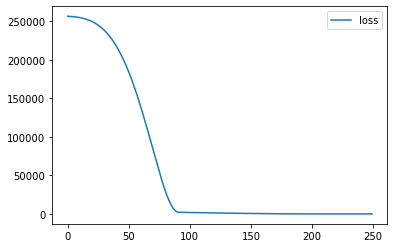

In [26]:
loss_df.plot()

## EVALUATION OF THE MODEL.

So we will try this model in new data, essentially the test data. And this returns the loss of the test set. For this example we have chose mean square error 'mse', so on the test set our model gives back a mse = 25.15

In [27]:
model.evaluate(X_test, y_test, verbose=0)

25.28421974182129

We can try in the train set as well

In [28]:
model.evaluate(X_train, y_train, verbose=0)

24.74885368347168

We interpretate this as a meassure of how our model perform, an additionally try out with other kind of errors

In [29]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [30]:
test_predictions #Here we see a list of prizes based on X_test set Numpy Array

array([[404.69406],
       [622.7475 ],
       [591.35675],
       [571.5058 ],
       [366.10446],
       [578.43445],
       [514.4056 ],
       [458.44452],
       [548.5446 ],
       [446.8633 ],
       [611.0031 ],
       [548.17267],
       [418.4956 ],
       [408.28235],
       [650.3742 ],
       [436.66125],
       [507.72363],
       [659.1485 ],
       [661.77435],
       [564.7784 ],
       [333.72107],
       [444.2058 ],
       [381.96985],
       [378.1812 ],
       [565.858  ],
       [609.83746],
       [531.6883 ],
       [427.24   ],
       [654.6525 ],
       [413.4591 ],
       [441.98846],
       [484.4605 ],
       [437.78552],
       [681.0262 ],
       [424.11316],
       [417.10025],
       [501.19305],
       [549.7454 ],
       [509.08163],
       [394.817  ],
       [617.7933 ],
       [416.00867],
       [603.666  ],
       [445.2936 ],
       [501.30774],
       [580.9089 ],
       [668.1294 ],
       [489.71204],
       [318.0396 ],
       [484.7646 ],


We can compare these values with the true values (y_test) by plotign them. For this we need to turn our numpy array (test_predictions) into a pandas series and creat a DataFrame with the y_test.

In [31]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [32]:
#test_predictions

In [33]:
pred_df = pd.DataFrame(y_test, columns=['Test True y'])

In [34]:
pred_df = pd.concat([pred_df,test_predictions], axis=1)

In [35]:
pred_df.columns = ['Test True y', 'Model predictions']

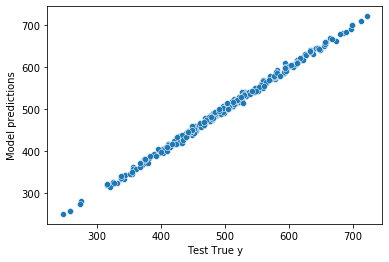

In [36]:
sns.scatterplot(data=pred_df, x = 'Test True y', y='Model predictions')

We observe that our model predcits quite well

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mean_absolute_error(pred_df['Test True y'], pred_df['Model predictions'])

4.027820661422438

Tiene sentido que el mse sea igual al obtenido al evaluar el model con .evaluate

In [39]:
mean_squared_error(pred_df['Test True y'], pred_df['Model predictions'])

25.284222033368724

Para obtener el root mean squared error, simplemente:

In [40]:
mean_squared_error(pred_df['Test True y'], pred_df['Model predictions'])**0.5

5.028341877136908

Para saber si es un buen error o no, lo comparamos con el valor medio del precio. Observamos que el valor medio es 498 y nuestro error absoluto es 4, es decir el 1%

In [41]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


Vamos ver como funciona nuestro modelo con datos nuevos. Es decir, si quiero poner mi casa a la venta basándome en feature1 y feature2, y obtener un precio al que debería piner mi casa

In [42]:
new_gem = [[998,1000]]

In [43]:
new_gem = scaler.transform(new_gem)

In [44]:
model.predict(new_gem)

1/1 [==============================] - 0s 16ms/step


array([[419.12335]], dtype=float32)

If our model did it pretty well we can save it

In [45]:
from tensorflow.keras.models import load_model

   we save it as   
   
   name_of_the_model.save('the name we want to put.h5')

In [46]:
model.save('my_gem_model.h5')

/home/hector/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
hector_model=load_model('my_gem_model.h5')

In [48]:
hector_model.predict(new_gem)

1/1 [==============================] - 0s 62ms/step


array([[419.12335]], dtype=float32)